# Explore AIMed Dataset


#### Download AIMed dataset from ftp://ftp.cs.utexas.edu/pub/mooney/bio-data/interactions.tar.gz"



In [1]:
data_dir = "/users/aeg/Downloads/interactions 3"

In [2]:
import sys
sys.path.append('./source')

#### Covert to pandas

In [3]:
from datatransformer.AimedToDataFrame import AimedToDataFrame
df = AimedToDataFrame().load_dir(data_dir)


In [4]:
df.head(n=10)

,docid,isValid,line_no,participant1,participant2,passage
0,abstract_11780382,False,6,IFN - alpha,IL - 4,Cytokines measurements during IFN - alpha trea...
1,abstract_11780382,False,7,IFN - alpha,IFN - gamma,Levels of IFN - gamma were slightly increased ...
2,abstract_11780382,False,8,IFN - alpha,IFN - gamma,In patients with a complete response to IFN - ...
3,abstract_11780382,False,8,IFN - alpha,IL - 4,In patients with a complete response to IFN - ...
4,abstract_11780382,False,8,IFN - gamma,IL - 4,In patients with a complete response to IFN - ...
5,abstract_11781009,False,2,BMP receptor type IB,BMPRIB,AB - This study describes the distributions of...
6,abstract_11781009,False,2,BMP receptor type IB,Col II,AB - This study describes the distributions of...
7,abstract_11781009,False,2,BMP receptor type IB,Col III,AB - This study describes the distributions of...
8,abstract_11781009,False,2,BMP receptor type IB,bone morphogenetic protein ( BMP ) - 2,AB - This study describes the distributions of...
9,abstract_11781009,False,2,BMPRIB,Col II,AB - This study describes the distributions of...


In [5]:
df.shape

(3677, 6)

In [6]:
unique_passages = df["passage"].unique()
unique_sentence_count=[ len(r.split("\n")) for r in unique_passages]
print("Unique setences :  " , sum(unique_sentence_count))

Unique setences :   1082


### Explore dataset

In [7]:
import matplotlib.pyplot as plt

df["isValid"].value_counts().plot.pie(autopct='%.2f',figsize=(4, 4))
plt.show()

<Figure size 400x400 with 1 Axes>

In [8]:
df["isValid"].value_counts()

False    3188
True      489
Name: isValid, dtype: int64

## Split into train/test/validation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

unique_docids = df.docid.unique()
stratified =  [ df.query("docid == '{}'".format(p))['isValid'].iloc[0] for p in unique_docids]
traindocid, valdocid = train_test_split(unique_docids,  test_size=.1,
                                                        random_state=777, stratify=stratified)

In [10]:

stratified =  [df.query("docid == '{}'".format(p))['isValid'].iloc[0] for p in traindocid]
traindocid, testdocid = train_test_split(traindocid,  test_size=.2,
                                                        random_state=777, stratify=stratified)

In [11]:
train = df[df['docid'].isin(traindocid)]
test = df[df['docid'].isin(testdocid)]
val = df[df['docid'].isin(valdocid)]




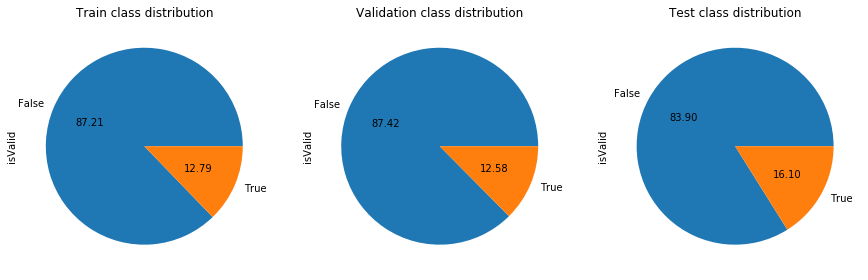

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(15,20))

ax[0].set_title('Train class distribution')
train.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])


ax[2].set_title('Test class distribution')
test.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[2])


plt.show()

In [13]:
train.to_json("AIMedtrain.json")
test.to_json("AIMedtest.json")
val.to_json("AIMedval.json")

In [33]:
train["l"]= train.apply(lambda r: len(r["passage"].split(" ")), axis=1)

/Users/aeg/miniconda/envs/untitled2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


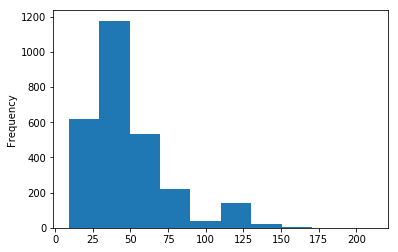

In [34]:
train["l"].plot.hist()

In [14]:
train.sample(n=20).to_json("Aimedsample.json")